# Forel Ule calculation test

## Compare Jobel repo from Garaba (2015) with formulae in Woerd and Wernand (2015, Sensors, Supplementary Information)

* Uses hyperspectral in situ observations from the Baltic as examples 
https://doi.org/10.5281/zenodo.5572537
* Also, compare the effect of different CMF tables

*Hendrik J. van der Woerd and Marcel R. Wernand 2015. True Colour Classification of Natural Waters with Medium-Spectral Resolution Satellites: SeaWiFS, MODIS, MERIS and OLCI. Sensors, 15, 25663-25680.*

*Qin, P., Simis, S.G.H., & Tilstone, G.H. (2017). Radiometric validation of atmospheric correction for MERIS in the Baltic Sea based on continuous observations from ships and AERONET-OC. Remote Sensing of Environment, 200, 263-280*


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.interpolate import interp1d
import math
import fume
import numpy as np

In [2]:
OLCIwavelength = [400,412.5,442.5,490,510,560,620,665,673.75,681.25,708.75,753.75,761.25,764.375,767.5,778.75,865,885,900,940,1020]
OLCIwavelength = OLCIwavelength[0:11] # bands 1 to 11
print(OLCIwavelength)

[400, 412.5, 442.5, 490, 510, 560, 620, 665, 673.75, 681.25, 708.75]


## Formulae from Woerd and Wernand (2015, Sensors, Supplementary Information)


```
OLCI
X3
0.154*reflec_1 + 2.957*reflec_2 + 10.861*reflec_3 + 3.744*reflec_4 + 3.750*reflec_5 +
34.687*reflec_6 + 41.853*reflec_7 + 7.323*reflec_8 + 0.591*reflec_9 + 0.549*reflec_10 +
0.189*reflec_11
Y3
0.004*reflec_1 + 0.112*reflec_2 + 1.711*reflec_3 + 5.672*reflec_4 + 23.263*reflec_5 +
48.791*reflec_6 + 23.949*reflec_7 + 2.836*reflec_8 + 0.216*reflec_9 + 0.199*reflec_10 +
0.068*reflec_11
Z3
0.731*reflec_1 + 14.354*reflec_2 + 58.356*reflec_3 + 28.227*reflec_4 + 4.022*reflec_5 +
0.618*reflec_6 + 0.026*reflec_7 + 0.000*reflec_8 + 0.000*reflec_9 + 0.000*reflec_10 +
0.000*reflec_11
Chrx
X3/(X3 + Y3 + Z3)
Chry
Y3/(X3 + Y3 + Z
    
HUESentinel3
((atan2((Chry − 0.333333), (Chrx − 0.333333)))*180/PI ) < 0? ((atan2((Chry − 0.333333),
(Chrx − 0.333333)))*180/PI) + 360:((atan2((Chry − 0.333333), (Chrx − 0.333333)))*180/PI)

HUESentinel3 100
HUESentinel3/100

POLYHueSentinel3
−12.5076*pow(HUESentinel3 100,5) + 91.6345*pow(HUESentinel3 100,4)
−249.8480*pow(HUESentinel3 100,3) + 308.6561*pow(HUESentinel3 100,2) − 165.4818*
HUESentinel3 100 + 28.5608
HUESentinel3Pcorr
HUEnewSentinel3 + POLYHueSentinel3
FUSentinel3Pcorr

FUSentinel3Pcorr = 
(HUESentinel3Pcorr > 232? 0:HUESentinel3Pcorr > 227.168? 1:(HUESentinel3Pcorr > 220.977?
2:(HUESentinel3Pcorr > 209.994? 3:(HUESentinel3Pcorr > 190.779? 4:(HUESentinel3Pcorr >
163.084? 5:(HUESentinel3Pcorr > 132.999? 6:(HUESentinel3Pcorr > 109.054? 7:(HUESentinel3Pcorr
> 94.037? 8:(HUESentinel3Pcorr > 83.346? 9:(HUESentinel3Pcorr > 74.572? 10:(HUESentinel3Pcorr
> 67.957? 11:(HUESentinel3Pcorr > 62.186? 12:(HUESentinel3Pcorr > 56.435?
13:(HUESentinel3Pcorr > 50.665? 14:(HUESentinel3Pcorr > 45.129? 15:(HUESentinel3Pcorr >
39.769? 16:(HUESentinel3Pcorr > 34.906? 17:(HUESentinel3Pcorr > 30.439? 18:(HUESentinel3Pcorr
> 26.337? 19:(HUESentinel3Pcorr > 22.741? 20:(HUESentinel3Pcorr > 19? 21:(HUESentinel3Pcorr <
19? 21:0))))))))))))))))))))))

```

In [3]:
def calc_fu_WW2015(wavelength, reflec):
    # wavelength in nm
    # reflec Rrs in sr-1


    #OLCI
    X3 = (0.154*reflec[0] + 2.957*reflec[1] + 10.861*reflec[2] + 3.744*reflec[3] + 
          3.750*reflec[4] + 34.687*reflec[5] + 41.853*reflec[6] + 7.323*reflec[7] + 
          0.591*reflec[8] + 0.549*reflec[9] + 0.189*reflec[10])
    Y3 = (0.004*reflec[0] + 0.112*reflec[1] + 1.711*reflec[2] + 5.672*reflec[3] + 
          23.263*reflec[4] + 48.791*reflec[5] + 23.949*reflec[6] + 2.836*reflec[7] + 
          0.216*reflec[8] + 0.199*reflec[9] + 0.068*reflec[10])
    Z3 = (0.731*reflec[0] + 14.354*reflec[1] + 58.356*reflec[2] + 28.227*reflec[3] + 
          4.022*reflec[4] + 0.618*reflec[5] + 0.026*reflec[6] + 0.000*reflec[7] + 
          0.000*reflec[8] + 0.000*reflec[9] + 0.000*reflec[10])
    Chrx = X3/(X3 + Y3 + Z3)
    Chry = Y3/(X3 + Y3 + Z3)

    HUESentinel3 = ((math.atan2((Chry - 0.333333), (Chrx - 0.333333)))*180/math.pi) # degrees
    if HUESentinel3 < 0:
        HUESentinel3 = HUESentinel3+360

    HUESentinel3_100 = HUESentinel3/100

    POLYHueSentinel3 = (-12.5076*pow(HUESentinel3_100,5) + 
                        91.6345*pow(HUESentinel3_100,4) - 
                        249.8480*pow(HUESentinel3_100,3) + 
                        308.6561*pow(HUESentinel3_100,2) - 
                        165.4818*HUESentinel3_100 + 28.5608 )

    HUESentinel3Pcorr = HUESentinel3 + POLYHueSentinel3

    if (HUESentinel3Pcorr > 232):
        FUSentinel3Pcorr = 0
    elif HUESentinel3Pcorr > 227.168:
        FUSentinel3Pcorr = 1
    elif (HUESentinel3Pcorr > 220.977):
        FUSentinel3Pcorr = 2
    elif (HUESentinel3Pcorr > 209.994):
        FUSentinel3Pcorr = 3
    elif (HUESentinel3Pcorr > 190.779):
        FUSentinel3Pcorr = 4
    elif (HUESentinel3Pcorr > 163.084):
        FUSentinel3Pcorr = 5
    elif (HUESentinel3Pcorr > 132.999):
        FUSentinel3Pcorr = 6
    elif (HUESentinel3Pcorr > 109.054):
        FUSentinel3Pcorr = 7
    elif (HUESentinel3Pcorr > 94.037):
        FUSentinel3Pcorr = 8
    elif (HUESentinel3Pcorr > 83.346):
        FUSentinel3Pcorr = 9
    elif (HUESentinel3Pcorr > 74.572):
        FUSentinel3Pcorr = 10
    elif (HUESentinel3Pcorr > 67.957):
        FUSentinel3Pcorr =  11
    elif (HUESentinel3Pcorr > 62.186):
        FUSentinel3Pcorr =  12
    elif (HUESentinel3Pcorr > 56.435):
        FUSentinel3Pcorr = 13
    elif (HUESentinel3Pcorr > 50.665):
        FUSentinel3Pcorr =  14
    elif (HUESentinel3Pcorr > 45.129):
        FUSentinel3Pcorr =  15
    elif (HUESentinel3Pcorr > 39.769):
        FUSentinel3Pcorr =  16
    elif (HUESentinel3Pcorr > 34.906):
        FUSentinel3Pcorr =  17
    elif (HUESentinel3Pcorr > 30.439):
        FUSentinel3Pcorr =  18
    elif (HUESentinel3Pcorr > 26.337):
        FUSentinel3Pcorr =  19
    elif (HUESentinel3Pcorr > 22.741):
        FUSentinel3Pcorr =  20
    elif (HUESentinel3Pcorr > 19):
        FUSentinel3Pcorr =  21
    elif (HUESentinel3Pcorr < 19):
        FUSentinel3Pcorr =  21

    #print('Chrx',Chrx)
    #print('Chry:',Chry)
    #print('HUESentinel3:',HUESentinel3,'degrees')
    #print('POLYHueSentinel3:',POLYHueSentinel3, 'degrees')
    #print('HUESentinel3Pcorr:',HUESentinel3Pcorr, 'degrees')
    #print('FUSentinel3Pcorr',FUSentinel3Pcorr)
    
    return FUSentinel3Pcorr


## Read hyperspectral data and interpolate to Satellite bands

C:\Users\tams00\AppData\Local\Temp\ipykernel_40356\3856471779.py:4: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  obs = pd.read_csv(sep = "\,", filepath_or_buffer = "data/rrs-bal-filtered.csv")


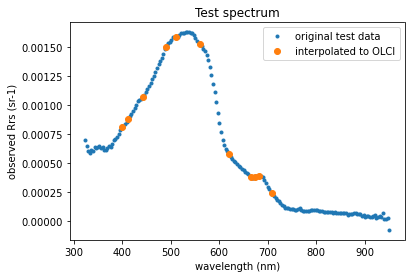

In [4]:
# https://doi.org/10.5281/zenodo.5572537
iobs = 1

obs = pd.read_csv(sep = "\,", filepath_or_buffer = "data/rrs-bal-filtered.csv")
obsband = [int(name.split('_')[1]) for name in list(obs.columns[4:])]
obswavelength = [int(name.split('_')[-1])/10 for name in list(obs.columns[4:])]
obsRrs = obs.iloc[iobs,4:].values

# retrieving the reflectance values for OLCI band frequencies
satRrs = interp1d(obswavelength, obsRrs, kind = 'linear')(OLCIwavelength)


plt.plot(obswavelength,obsRrs,'.',label='original test data')
plt.plot(OLCIwavelength,satRrs,'o',label='interpolated to OLCI')
plt.ylabel('observed Rrs (sr-1)')
plt.xlabel('wavelength (nm)')
plt.title('Test spectrum')
plt.legend()


## Compare FUME with Woer&Wernand 2015 using Baltic observations

In [29]:
fus_ww2015 = []
fus_fume = []

from timeit import default_timer as timer

start = timer()
for iobs in range(5400,5804):

    obsRrs = obs.iloc[iobs,4:].values

    # retrieving the reflectance values for OLCI band frequencies
    satRrs = interp1d(obswavelength, obsRrs, kind = 'linear')(OLCIwavelength)

    #Calculate Forel Ule
    
    fu_ww2015 = calc_fu_WW2015(OLCIwavelength,satRrs)
    fu_fume = fume.calc_ForelUle_image(np.array(OLCIwavelength), np.expand_dims(np.array(satRrs), axis=[1,2]),sensorcorr='olci')[0,0]
    
    fus_ww2015.append(fu_ww2015)
    fus_fume.append(fu_fume)


Text(0, 0.5, 'FUME')

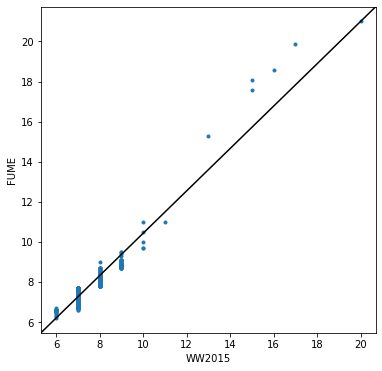

In [30]:
fig, ax = plt.subplots(1,1,figsize=(6,6))
plt.plot(fus_ww2015, fus_fume,'.')
type(ax)
ax.plot([0, 1], [0, 1], color='k', transform=ax.transAxes)
plt.xlabel('WW2015')
plt.ylabel('FUME')

In [7]:
sensorcorr = 'meris'
sensor_corr_file = 'data/sensor_hue_corr_WW2015'
sensorcorrdf = pd.read_csv(sensor_corr_file,index_col=0,)
sensor_coef = sensorcorrdf.loc[sensorcorr]
sensor_coef.values

def polynomial(coefs,x):
    order = len(coefs)-1
    
    return sum( [coef*x**(order-i) for i,coef in enumerate(coefs) ])

polynomial(sensor_coef,0)

28.5255

In [44]:
sensorcorrdf

,a5,a4,a3,a2,a1,k
sensor,,,,,,
meris,−12.0506,88.9325,−244.6960,305.2361,−164.6960,28.5255
olci,−12.5076,91.6345,−249.8480,308.6561,−165.4818,28.5608
modisa,−48.0880,362.6179,−1011.7151,1262.0348,−666.5981,113.9215
seawifs,−49.4377,363.2770,−978.1648,1154.6030,−552.2701,78.2940


## Effect of Hue angle correction for OLCI

In [20]:
fus_fumenocorr = []
fus_fumecorr = []

from timeit import default_timer as timer

start = timer()
for iobs in range(0,5804):

    obsRrs = obs.iloc[iobs,4:].values

    # retrieving the reflectance values for OLCI band frequencies
    satRrs = interp1d(obswavelength, obsRrs, kind = 'linear')(OLCIwavelength)

    #Calculate Forel Ule
    
    fu_fumenocorr = fume.calc_ForelUle_image(np.array(OLCIwavelength), np.expand_dims(np.array(satRrs), axis=[1,2]))[0,0]
    fu_fumecorr = fume.calc_ForelUle_image(np.array(OLCIwavelength), np.expand_dims(np.array(satRrs), axis=[1,2]),sensorcorr='olci')[0,0]
    
    fus_fumenocorr.append(fu_fumenocorr)
    fus_fumecorr.append(fu_fumecorr)

Text(0.5, 1.0, 'sensorcorr=olci')

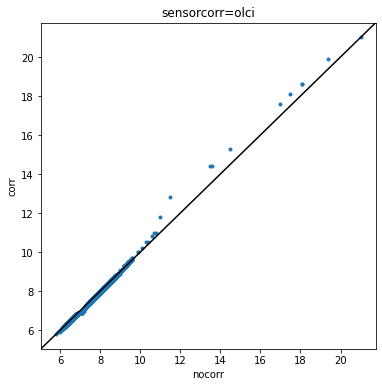

In [22]:
fig, ax = plt.subplots(1,1,figsize=(6,6))
plt.plot(fus_fumenocorr, fus_fumecorr,'.')
type(ax)
ax.plot([0, 1], [0, 1], color='k', transform=ax.transAxes)
plt.xlabel('nocorr')
plt.ylabel('corr')
plt.title('sensorcorr=olci')

## Effect of CFM functions

In [33]:
cmf='data/FUI_CIE1931_JV.tsv'

fus_fumecmf1 = []
fus_fumecmf2 = []

from timeit import default_timer as timer

start = timer()
for iobs in range(0,5804):

    obsRrs = obs.iloc[iobs,4:].values

    # retrieving the reflectance values for OLCI band frequencies
    satRrs = interp1d(obswavelength, obsRrs, kind = 'linear')(OLCIwavelength)

    #Calculate Forel Ule
    
    fu_fumecmf1 = fume.calc_ForelUle_image(np.array(OLCIwavelength), np.expand_dims(np.array(satRrs), axis=[1,2]),sensorcorr='olci',cmf='data/FUI_CIE1931.tsv')[0,0]
    fu_fumecmf2 = fume.calc_ForelUle_image(np.array(OLCIwavelength), np.expand_dims(np.array(satRrs), axis=[1,2]),sensorcorr='olci',cmf='data/FUI_CIE1931_JV.tsv')[0,0]
    
    fus_fumecmf1.append(fu_fumecmf1)
    fus_fumecmf2.append(fu_fumecmf2)

Text(0.5, 1.0, 'CMF')

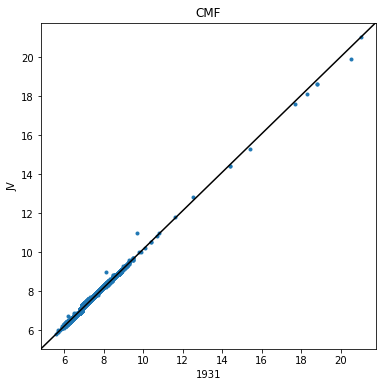

In [34]:
fig, ax = plt.subplots(1,1,figsize=(6,6))
plt.plot(fus_fumecmf1, fus_fumecmf2,'.')
type(ax)
ax.plot([0, 1], [0, 1], color='k', transform=ax.transAxes)
plt.xlabel('1931')
plt.ylabel('JV')
plt.title('CMF')

## Compare FUME with WW2015 but using same CIE1931

In [39]:
fus_ww2015 = []
fus_fume = []

from timeit import default_timer as timer

start = timer()
for iobs in range(5400,5804):

    obsRrs = obs.iloc[iobs,4:].values

    # retrieving the reflectance values for OLCI band frequencies
    satRrs = interp1d(obswavelength, obsRrs, kind = 'linear')(OLCIwavelength)

    #Calculate Forel Ule
    
    fu_ww2015 = calc_fu_WW2015(OLCIwavelength,satRrs)
    fu_fume = fume.calc_ForelUle_image(np.array(OLCIwavelength), 
                                       np.expand_dims(np.array(satRrs), axis=[1,2]),
                                       sensorcorr='olci',
                                       cmf='data/FUI_CIE1931.tsv')[0,0]
    
    fus_ww2015.append(fu_ww2015)
    fus_fume.append(fu_fume)

Text(0.5, 1.0, 'using CIE1931')

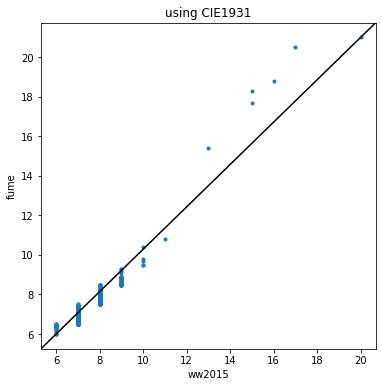

In [40]:
fig, ax = plt.subplots(1,1,figsize=(6,6))
plt.plot(fus_ww2015, fus_fume,'.')
type(ax)
ax.plot([0, 1], [0, 1], color='k', transform=ax.transAxes)
plt.xlabel('ww2015')
plt.ylabel('fume')
plt.title('using CIE1931')